In [269]:
import torch
import numpy as np
import networkx as nx
import pickle
import os
import matplotlib.pyplot as plt

In [270]:
dataset= 'squirrel'

In [271]:
z_dir = '../pygcn/z_vis/' + dataset + '/0/'

In [272]:
graph_edges = '../pygcn/new_data/' + dataset + '/out1_graph_edges.txt'
with open(graph_edges, 'r') as f:
    lines = f.readlines()

In [273]:
node_nums ={
    'texas': 183,
    'wisconsin': 251,
    'cornell': 183,
    'film': 7600,
    'squirrel': 5201,
    'chameleon': 2277,
    'cora': 2708,
    'citeseer': 3327,
    'pubmed': 19717
}

node_num = node_nums[dataset]
adj = np.zeros((node_num, node_num))

for i in range(1, len(lines)):
    line = lines[i]
    line = line.rstrip().split('\t')
    adj[int(line[0]), int(line[1])] = 1
    adj[int(line[1]), int(line[0])] = 1


In [274]:
adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
G = nx.from_numpy_matrix(adj)

In [276]:
# path_dir = 'hop_pkls/' + dataset + '_path.pkl'

# if os.path.exists(path_dir):
#     with open(path_dir, 'rb') as f:
#         path = pickle.load(f)
# else:
#     path = dict(nx.all_pairs_shortest_path(G))
#     with open(path_dir, 'wb') as f:
#         pickle.dump(path, f)

In [277]:
path_length_dir = 'hop_pkls/' + dataset + '_path_length.pkl'

if os.path.exists(path_length_dir):
    with open(path_length_dir, 'rb') as f:
        path_length = pickle.load(f)
else:
    path_length = dict(nx.all_pairs_shortest_path_length(G))
    with open(path_length_dir, 'wb') as f:
        pickle.dump(path_length, f)



In [278]:
distance = np.zeros((node_num, node_num))
for i in range(node_num):
    for j in range(node_num):
        distance[i][j] = path_length[i][j]

In [279]:
unique, counts = np.unique(distance, return_counts=True)
print(np.asarray((unique, counts)).T)

[[0.0000000e+00 7.6000000e+03]
 [1.0000000e+00 5.3318000e+04]
 [2.0000000e+00 2.5291360e+06]
 [3.0000000e+00 1.2909562e+07]
 [4.0000000e+00 2.3515174e+07]
 [5.0000000e+00 1.3979884e+07]
 [6.0000000e+00 3.9136220e+06]
 [7.0000000e+00 7.3255200e+05]
 [8.0000000e+00 1.0508000e+05]
 [9.0000000e+00 1.2884000e+04]
 [1.0000000e+01 1.1200000e+03]
 [1.1000000e+01 6.6000000e+01]
 [1.2000000e+01 2.0000000e+00]]


In [280]:
unique

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [281]:
counts

array([    7600,    53318,  2529136, 12909562, 23515174, 13979884,
        3913622,   732552,   105080,    12884,     1120,       66,
              2])

In [282]:
epoch_list = []
for file in os.listdir(z_dir):
    if file != 'label.pt' and file != 'adj.pt':
        # print(file)
        name = file.split('.')[0]
        name = name.split('_')[1]        
        epoch_list.append(int(name))

epoch = max(epoch_list)
print(epoch)

103


In [283]:
z = torch.load(z_dir+'z_' + str(epoch) + '.pt')

In [284]:
z.shape

torch.Size([7600, 7600])

In [285]:
z = z.detach().numpy()

In [286]:
labels = torch.load(z_dir + 'label.pt')

In [287]:
labels.shape

torch.Size([7600])

In [288]:
labels = labels.detach().numpy()

In [289]:
z_pos_sum = [0] * unique.shape[0]
friends_sum = [0] * unique.shape[0]


for i in range(node_num):
    for j in range(node_num):
        if labels[i] == labels[j]:
            friends_sum[int(distance[i][j])] += 1
            if z[i][j] > 0:
                z_pos_sum[int(distance[i][j])] += 1

print('z_pos_sum', z_pos_sum)
print('friends_sum', friends_sum)

z_pos_sum [7600, 11553, 433037, 1922537, 4611831, 2830070, 795485, 150712, 21183, 2905, 225, 12, 0]
friends_sum [7600, 11556, 529942, 2731820, 5023526, 2998940, 840846, 158130, 21936, 2984, 234, 14, 0]


In [290]:
z_pos_sum_log = [np.log2(p) for p in z_pos_sum]
friends_sum_log = [np.log2(f) for f in friends_sum]

z_pos_sum_log = np.around(z_pos_sum_log, 2)
friends_sum_log = np.around(friends_sum_log, 2)

print('z_pos_sum_log', z_pos_sum_log)
print('friends_sum_log', friends_sum_log)

z_pos_sum_log [12.89 13.5  18.72 20.87 22.14 21.43 19.6  17.2  14.37 11.5   7.81  3.58
  -inf]
friends_sum_log [12.89 13.5  19.02 21.38 22.26 21.52 19.68 17.27 14.42 11.54  7.87  3.81
  -inf]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [291]:
counts

array([    7600,    53318,  2529136, 12909562, 23515174, 13979884,
        3913622,   732552,   105080,    12884,     1120,       66,
              2])

In [292]:
ratio = [z_pos_sum[i]/counts[i] for i in range(len(z_pos_sum))]
ratio

[1.0,
 0.2166810458006677,
 0.17121934130865243,
 0.14892348787666074,
 0.1961214915951717,
 0.20243873268190207,
 0.20326056016651584,
 0.20573556552981903,
 0.2015892653216597,
 0.22547345544861844,
 0.20089285714285715,
 0.18181818181818182,
 0.0]

In [293]:
len(z_pos_sum)

13

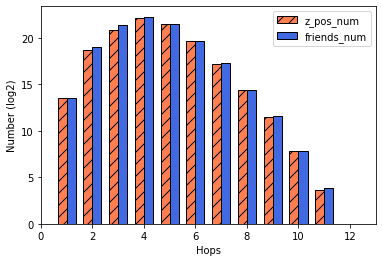

In [294]:
plt.figure()
width = 0.35
plt.xlim(0, len(z_pos_sum))
plt.ylabel('Number (log2)')
plt.xlabel('Hops')
hops = np.arange(1, len(z_pos_sum), 1)
# new_ratio = [r * 100 for r in ratio[1:]]
# plt.plot(hops, new_ratio, marker='*')
hatchs = ["//", "\\"]
plt.bar(hops - width/2, z_pos_sum_log[1:], label='z_pos_num', width=width, hatch='//', edgecolor='black', color='coral')
plt.bar(hops + width/2, friends_sum_log[1:], label='friends_num', width=width, hatch="", edgecolor='black', color='royalblue')
plt.legend(loc='upper right')
plt.savefig('case_study/case_study_{}.pdf'.format(dataset))
plt.show()